In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

**Load Data**


In [2]:
train_dir='/kaggle/input/face-mask-detect/maskdata/maskdata/train'

test_dir='/kaggle/input/face-mask-detect/maskdata/maskdata/test'

In [3]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [4]:
train_images = train_generator.flow_from_directory(train_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=True,seed=42,subset='training')
val_images = train_generator.flow_from_directory(train_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=True,seed=42,subset='validation')
test_images = test_generator.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=False)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


**Traning**


In [5]:
inputs=tf.keras.Input(shape=(224,224,3))
x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(inputs)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 64)               0     

In [6]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_images,validation_data=val_images,epochs = 100,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,)])

Epoch 1/100
16/16 [==============================] - 26s 2s/step - loss: 0.6808 - accuracy: 0.5538 - val_loss: 0.6790 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 24s 1s/step - loss: 0.6724 - accuracy: 0.5538 - val_loss: 0.6700 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 23s 1s/step - loss: 0.6712 - accuracy: 0.5639 - val_loss: 0.6638 - val_accuracy: 0.5935
Epoch 4/100
16/16 [==============================] - 24s 1s/step - loss: 0.6685 - accuracy: 0.5903 - val_loss: 0.6660 - val_accuracy: 0.6585
Epoch 5/100
16/16 [==============================] - 23s 1s/step - loss: 0.6570 - accuracy: 0.6572 - val_loss: 0.6443 - val_accuracy: 0.6098
Epoch 6/100
16/16 [==============================] - 24s 1s/step - loss: 0.6399 - accuracy: 0.6450 - val_loss: 0.6240 - val_accuracy: 0.6585
Epoch 7/100
16/16 [==============================] - 24s 1s/step - loss: 0.6182 - accuracy: 0.6795 - val_loss: 0.6073 - val_accuracy: 0.6179
Epoch 8/100
1

In [7]:
results=model.evaluate(test_images,verbose=0)
print("Loss{:.5f}".format(results[0]))
print("Accuracy{:.5f}".format(results[1] * 100))

Loss0.20696
Accuracy93.93939


**Vizualize Result**

In [8]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
sample_images=sample_generator.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=True,seed=42)

Found 198 images belonging to 2 classes.


1/1 [==============================] - 1s 509ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

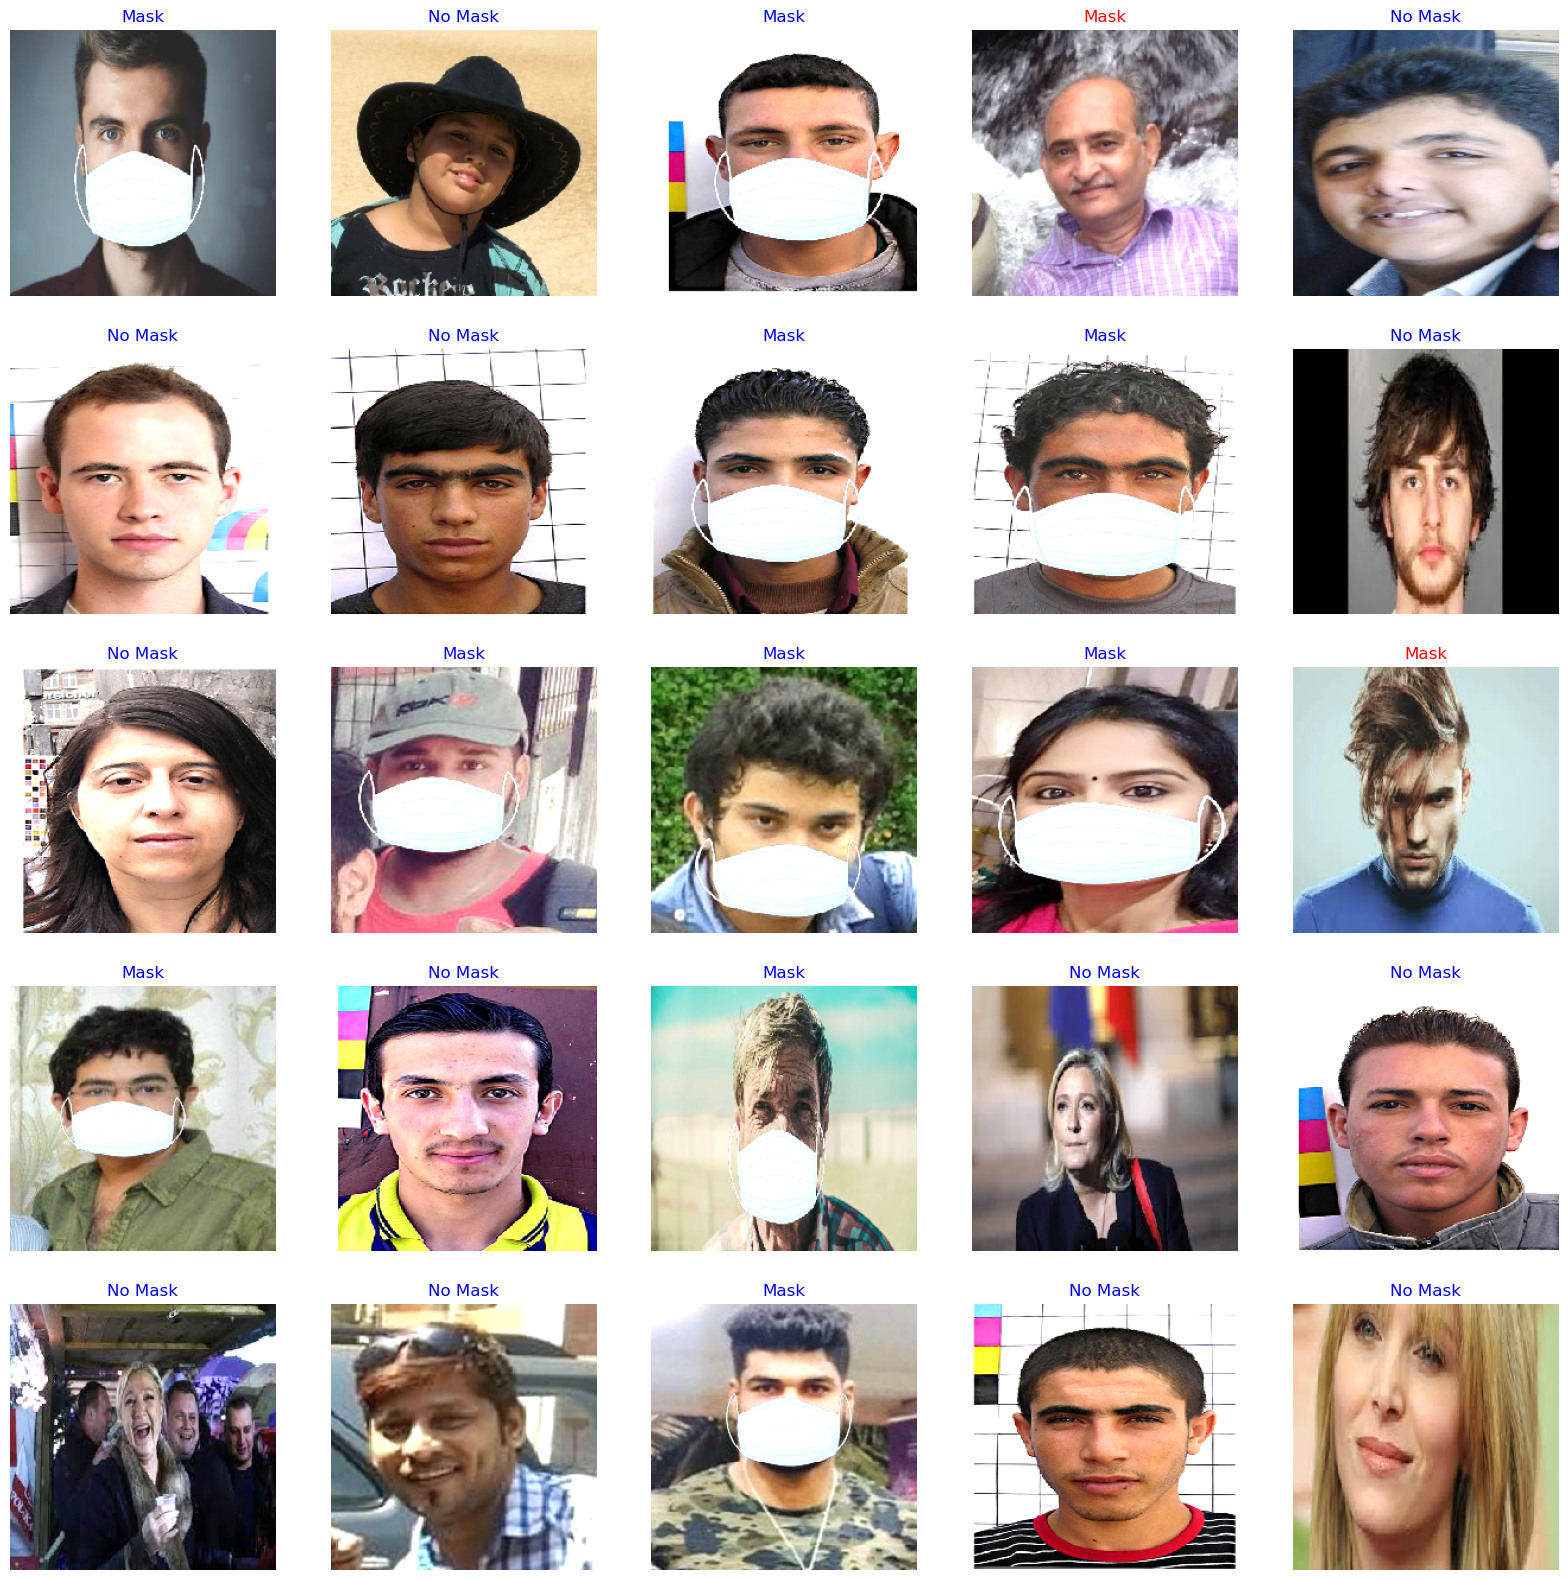

In [9]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize = (20, 20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("No Mask" if predictions[i] == 1 else "Mask"), color=('blue' if labels[i] == predictions[i] else 'red'))
plt.show()

**Further applications**
A mask detector like this one can be used in security cameras and only allow to entry of those individuals who have a mask on.it will be extremely beneficial and can even lessen the transimission rate.Another application can be identified the people wearing masks and not wearing masks in an epicentre of corona cirus so as to examine tghe circumtances and analyse if weraing a mask is really beneficaial or not.